In [1]:
%pylab inline
import spectral
from scipy.cluster.vq import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


Populating the interactive namespace from numpy and matplotlib


In [2]:
f = '/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr'

img = spectral.open_image(f)
print img 
data = img.load()

	Data Source:   '/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube'
	# Rows:           1500
	# Samples:        1000
	# Bands:           285
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:     int16


(1500000, 285)


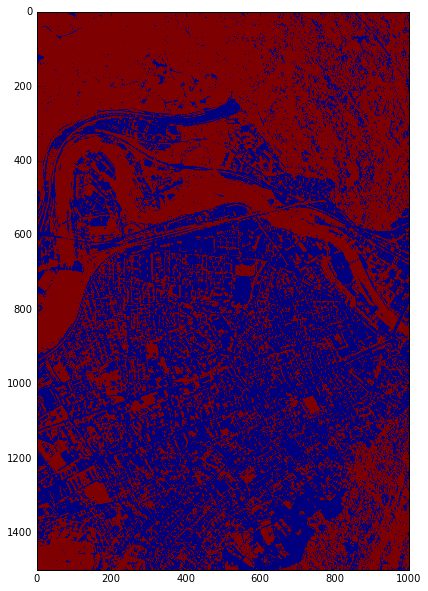

In [3]:
data = data.reshape((-1, 285))
print data.shape
c, d = kmeans2(data, 2, iter=1)
d = d.reshape((1500, 1000))
figure(figsize = (15,10))
imshow(d)

In [46]:
def kmeans_iterate(data, shape, c, epoch, n):
    for i in arange(n):
        figure(figsize = (15,10))
        c, d = kmeans2(data, c, iter=epoch)
        imshow(d.reshape(shape))
        show()
    return c, d

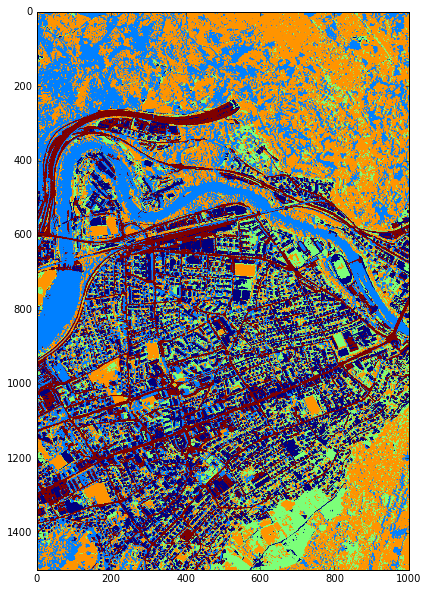

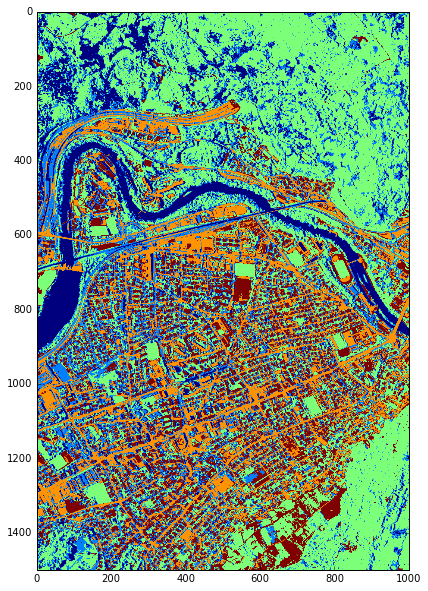

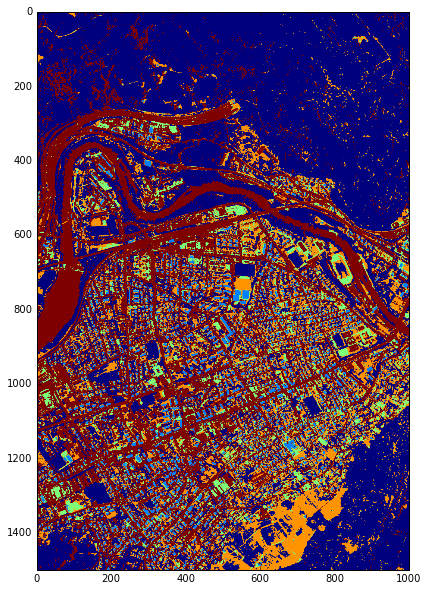

In [43]:
kmeans_iterate(data, (1500, 1000), 5, 2, 3)

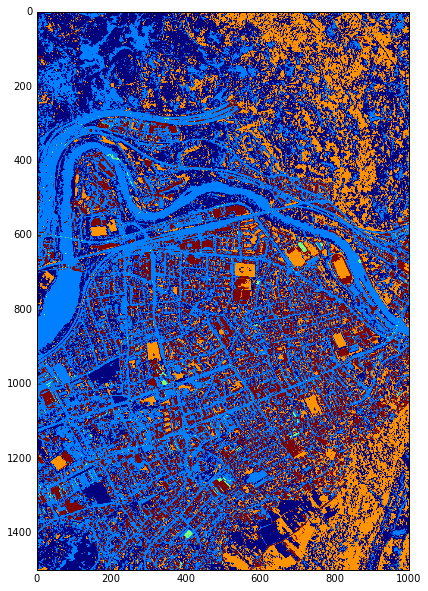

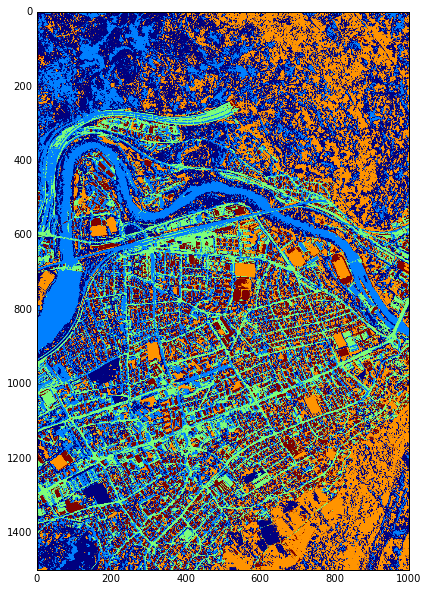

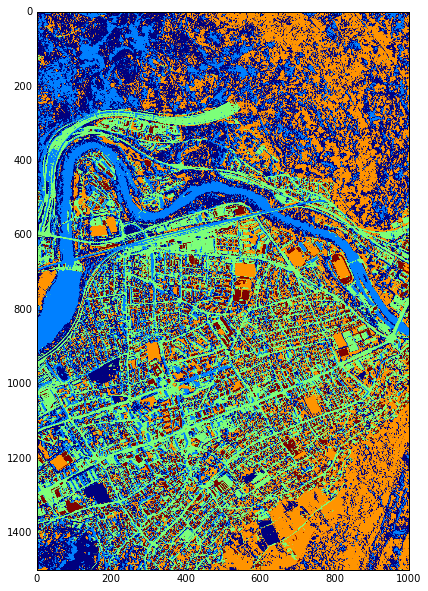

In [47]:
c, d = kmeans_iterate(whiten(data), (1500, 1000), 5, 2, 3)

In [18]:
from sklearn.cluster import DBSCAN, Birch


data_b = data.astype('float16')
print data_b.shape, data_b
brt = Birch()
brt.fit(data_b)
imshow(brt.predict(data_b).resize((1500, 1000)))

(1500000, 285) [[  28.   40.   53. ...,    0.    0.    0.]
 [  62.   27.   35. ...,    0.    0.    0.]
 [  21.   22.   23. ...,    0.    0.    0.]
 ..., 
 [  84.  124.  153. ...,  288.  263.  255.]
 [ 109.  157.  188. ...,  270.  254.  244.]
 [  95.  139.  169. ...,  270.  254.  244.]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').